In [89]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!head "../NER_Dataset/ner-gmb/train.txt"


the DT The O
anatolia NNP Anatolia B-org
news NN news O
agency NN agency O
say VBD said O
saturday NNP Saturday B-tim
that IN that O
the DT the O
officer NNS officers O


In [58]:
df = pd.read_csv("../NER_Dataset/ner-gmb/train.txt", sep = " ", header = None, names = ['token', 'postag', 'word', 'nertag'], skip_blank_lines=False)

In [59]:
#split dataframe into blank rows
df_list = np.split(df, df[df.isnull().all(1)].index) 

In [60]:
df_list[2]

,token,postag,word,nertag
42,NaN,NaN,NaN,NaN
43,he,PRP,He,O
44,say,VBD,said,O
45,the,DT,the,O
46,three,CD,three,O
47,be,VBD,were,O
48,kidnap,VBN,kidnapped,O
49,while,IN,while,O
50,drive,VBG,driving,O
51,through,IN,through,O


In [61]:
#add sentence number to each dataframe and then combine. Also for each dataframe remove the first row

def remove_first_row(df):
    '''removes the first row after the heading from the dataframe - used for removing NaN row'''
    df.drop([0], inplace = True)
    return df
    
def add_sentence_number(df, i):
    '''adds a column to df in which all rows have value i'''
    df['sentence'] = i
    return df
    

new_dflist = []
for i, df in enumerate(df_list[1:]):
    df.reset_index(drop=True, inplace = True)
    df = remove_first_row(df)
    df = add_sentence_number(df, i)
    new_dflist.append(df)

# df = combine_dataframes(new_dflist)    

In [62]:
len(new_dflist)

37207

In [66]:
new_dflist[1]

,token,postag,word,nertag,sentence
1,he,PRP,He,O,1
2,say,VBD,said,O,1
3,the,DT,the,O,1
4,three,CD,three,O,1
5,be,VBD,were,O,1
6,kidnap,VBN,kidnapped,O,1
7,while,IN,while,O,1
8,drive,VBG,driving,O,1
9,through,IN,through,O,1
10,pakistan,NNP,Pakistan,B-geo,1


In [73]:
def combine_dataframes(df_list):

    return pd.concat(df_list)


df = combine_dataframes(new_dflist)
df.reset_index(drop=True, inplace = True)

In [74]:
df.head(100)

,token,postag,word,nertag,sentence
0,the,DT,The,O,0
1,anatolia,NNP,Anatolia,B-org,0
2,news,NN,news,O,0
3,agency,NN,agency,O,0
4,say,VBD,said,O,0
...,...,...,...,...,...
95,say,VBP,say,O,4
96,two,CD,two,O,4
97,bomb,NN,bomb,O,4
98,blast,NNS,blasts,O,4


In [75]:
df.shape

(813591, 5)

In [77]:
#number of sentences
print(df.sentence.unique())
print(len(df.sentence.unique()))

[    0     1     2 ... 37203 37204 37205]
37206


In [81]:
#length of sentences
df_new = df.groupby('sentence').count()
df_new.head

<bound method NDFrame.head of           token  postag  word  nertag
sentence                             
0            41      41    41      41
1            24      24    24      24
2             9       9     9       9
3            20      20    20      20
4            36      36    36      36
...         ...     ...   ...     ...
37201        31      31    31      31
37202        18      18    18      18
37203        28      28    28      28
37204        14      14    14      14
37205        19      19    19      19

[37206 rows x 4 columns]>

In [93]:
sent_lengths = list(df_new['token'])
sent_lengths

[41,
 24,
 9,
 20,
 36,
 28,
 20,
 36,
 20,
 33,
 14,
 22,
 35,
 17,
 36,
 23,
 27,
 19,
 20,
 43,
 14,
 29,
 22,
 23,
 21,
 29,
 28,
 28,
 28,
 17,
 36,
 22,
 11,
 27,
 27,
 47,
 22,
 20,
 19,
 28,
 13,
 13,
 23,
 16,
 35,
 26,
 15,
 29,
 36,
 14,
 21,
 26,
 12,
 19,
 29,
 14,
 22,
 24,
 26,
 33,
 15,
 22,
 9,
 23,
 35,
 17,
 16,
 18,
 24,
 42,
 14,
 28,
 17,
 27,
 23,
 33,
 20,
 12,
 33,
 15,
 14,
 23,
 23,
 5,
 27,
 26,
 20,
 32,
 19,
 16,
 14,
 21,
 21,
 18,
 21,
 23,
 23,
 12,
 14,
 22,
 35,
 12,
 13,
 16,
 23,
 30,
 6,
 17,
 18,
 31,
 20,
 38,
 19,
 21,
 25,
 18,
 25,
 17,
 16,
 22,
 18,
 22,
 16,
 21,
 29,
 9,
 16,
 12,
 21,
 26,
 19,
 13,
 26,
 22,
 21,
 8,
 19,
 29,
 26,
 23,
 15,
 15,
 41,
 11,
 21,
 27,
 16,
 15,
 17,
 26,
 12,
 15,
 26,
 8,
 22,
 10,
 20,
 25,
 26,
 20,
 22,
 26,
 35,
 23,
 31,
 28,
 23,
 22,
 10,
 55,
 16,
 26,
 30,
 21,
 13,
 25,
 15,
 7,
 19,
 21,
 13,
 8,
 24,
 23,
 18,
 28,
 35,
 34,
 30,
 20,
 23,
 28,
 26,
 22,
 34,
 21,
 19,
 18,
 40,
 23,
 31,
 25,

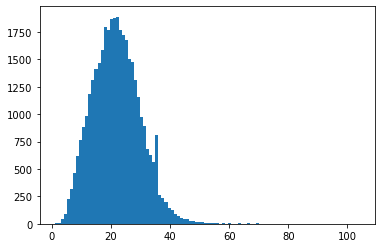

In [100]:
#histogram of lengths
plt.hist(sent_lengths, bins=100)
plt.show()

In [101]:
#max and min length of sentence in trainset
print(min(sent_lengths))
print(max(sent_lengths))

1
104


In [110]:
#unique ner tags of words of sentence
df.nertag.unique()

array(['O', 'B-org', 'B-tim', 'B-geo', 'B-gpe', 'B-per', 'I-per', 'I-org',
       nan, 'I-geo', 'I-tim', 'B-eve', 'I-eve', 'I-gpe', 'B-nat', 'I-nat',
       'B-art', 'I-art'], dtype=object)

In [113]:
df.loc[df['nertag'] == df.nertag.unique()[8]]


,token,postag,word,nertag,sentence
